The dataset includes various factors such as gender, home location, level of education, age, device usage, economic status, family size, internet accessibility, sports involvement, elderly care, sleep patterns, social media usage, gaming interests, study environment, group studies, academic performance, online interaction, doubt clarification, learning preferences, and satisfaction levels.

In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split


In [2]:
df=pd.read_csv('ONLINE EDUCATION SYSTEM.csv')

In [3]:
df.head()

,Gender,Home Location,Level of Education,Age(Years),Number of Subjects,Device type used to attend classes,Economic status,Family size,Internet facility in your locality,Are you involved in any sports?,...,Time spent on social media (Hours),Interested in Gaming?,Have separate room for studying?,Engaged in group studies?,Average marks scored before pandemic in traditional classroom,Your interaction in online mode,Clearing doubts with faculties in online mode,Interested in?,Performance in online,Your level of satisfaction in Online Education
0,Male,Urban,Under Graduate,18,11,Laptop,Middle Class,4,5,No,...,1,No,No,No,91-100,1,1,Practical,6,Average
1,Male,Urban,Under Graduate,19,7,Laptop,Middle Class,4,1,Yes,...,1,Yes,Yes,No,91-100,1,1,Theory,3,Bad
2,Male,Rural,Under Graduate,18,5,Laptop,Middle Class,5,2,No,...,1,No,Yes,No,71-80,1,1,Both,6,Bad
3,Male,Urban,Under Graduate,18,5,Laptop,Middle Class,4,4,Yes,...,2,No,No,yes,91-100,1,2,Theory,4,Bad
4,Male,Rural,Under Graduate,18,5,Laptop,Middle Class,4,3,No,...,2,Yes,Yes,yes,81-90,3,3,Both,6,Average


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1033 entries, 0 to 1032
Data columns (total 23 columns):
 #   Column                                                         Non-Null Count  Dtype 
---  ------                                                         --------------  ----- 
 0   Gender                                                         1033 non-null   object
 1   Home Location                                                  1033 non-null   object
 2   Level of Education                                             1033 non-null   object
 3   Age(Years)                                                     1033 non-null   int64 
 4   Number of Subjects                                             1033 non-null   int64 
 5   Device type used to attend classes                             1033 non-null   object
 6   Economic status                                                1033 non-null   object
 7   Family size                                                    1033 n

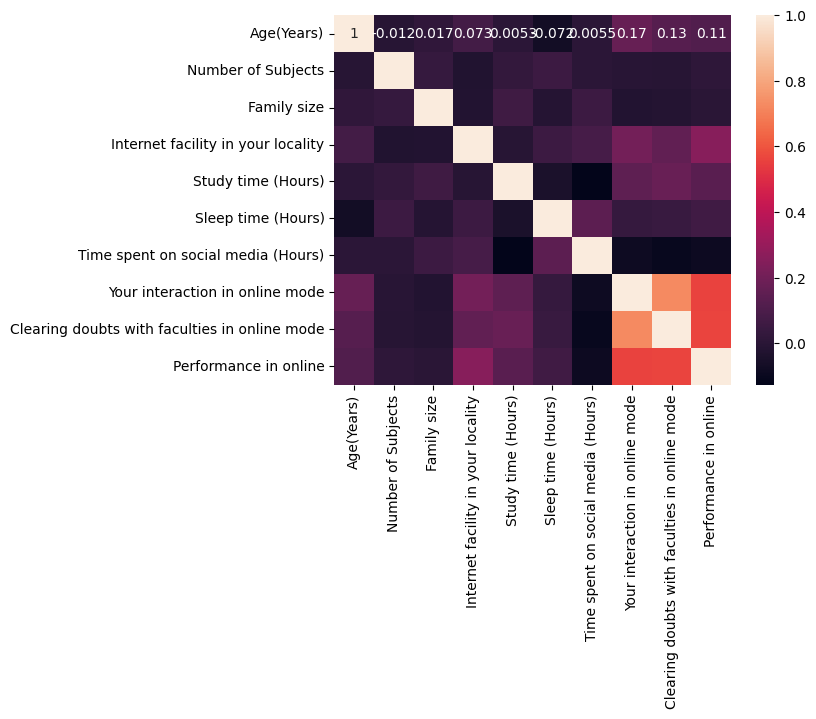

In [5]:
sns.heatmap(df.corr(numeric_only = True),annot=True)
plt.show()

In [6]:
df2=df.select_dtypes(exclude=object)

In [7]:
df2.corr()

,Age(Years),Number of Subjects,Family size,Internet facility in your locality,Study time (Hours),Sleep time (Hours),Time spent on social media (Hours),Your interaction in online mode,Clearing doubts with faculties in online mode,Performance in online
Age(Years),1.000000,-0.011505,0.016893,0.072625,0.005344,-0.072031,0.005455,0.171943,0.125559,0.114965
Number of Subjects,-0.011505,1.000000,0.035997,-0.025915,0.024280,0.051531,0.004833,-0.005144,-0.008595,0.012740
Family size,0.016893,0.035997,1.000000,-0.020996,0.060614,-0.015787,0.053512,-0.024268,-0.019461,0.001549
Internet facility in your locality,0.072625,-0.025915,-0.020996,1.000000,-0.011554,0.051838,0.082772,0.204391,0.158990,0.257339
Study time (Hours),0.005344,0.024280,0.060614,-0.011554,1.000000,-0.044385,-0.125986,0.148859,0.175169,0.134344
Sleep time (Hours),-0.072031,0.051531,-0.015787,0.051838,-0.044385,1.000000,0.144587,0.032598,0.043402,0.065020
Time spent on social media (Hours),0.005455,0.004833,0.053512,0.082772,-0.125986,0.144587,1.000000,-0.083972,-0.101847,-0.086568
Your interaction in online mode,0.171943,-0.005144,-0.024268,0.204391,0.148859,0.032598,-0.083972,1.000000,0.723216,0.557507
Clearing doubts with faculties in online mode,0.125559,-0.008595,-0.019461,0.158990,0.175169,0.043402,-0.101847,0.723216,1.000000,0.561091
Performance in online,0.114965,0.012740,0.001549,0.257339,0.134344,0.065020,-0.086568,0.557507,0.561091,1.000000


In [8]:
df2.corr().style.background_gradient(cmap="Blues")

,Age(Years),Number of Subjects,Family size,Internet facility in your locality,Study time (Hours),Sleep time (Hours),Time spent on social media (Hours),Your interaction in online mode,Clearing doubts with faculties in online mode,Performance in online
Age(Years),1.000000,-0.011505,0.016893,0.072625,0.005344,-0.072031,0.005455,0.171943,0.125559,0.114965
Number of Subjects,-0.011505,1.000000,0.035997,-0.025915,0.024280,0.051531,0.004833,-0.005144,-0.008595,0.012740
Family size,0.016893,0.035997,1.000000,-0.020996,0.060614,-0.015787,0.053512,-0.024268,-0.019461,0.001549
Internet facility in your locality,0.072625,-0.025915,-0.020996,1.000000,-0.011554,0.051838,0.082772,0.204391,0.158990,0.257339
Study time (Hours),0.005344,0.024280,0.060614,-0.011554,1.000000,-0.044385,-0.125986,0.148859,0.175169,0.134344
Sleep time (Hours),-0.072031,0.051531,-0.015787,0.051838,-0.044385,1.000000,0.144587,0.032598,0.043402,0.065020
Time spent on social media (Hours),0.005455,0.004833,0.053512,0.082772,-0.125986,0.144587,1.000000,-0.083972,-0.101847,-0.086568
Your interaction in online mode,0.171943,-0.005144,-0.024268,0.204391,0.148859,0.032598,-0.083972,1.000000,0.723216,0.557507
Clearing doubts with faculties in online mode,0.125559,-0.008595,-0.019461,0.158990,0.175169,0.043402,-0.101847,0.723216,1.000000,0.561091
Performance in online,0.114965,0.012740,0.001549,0.257339,0.134344,0.065020,-0.086568,0.557507,0.561091,1.000000


In [11]:
df4 = df.drop(columns=['Time spent on social media (Hours)','Number of Subjects','Sleep time (Hours)','Family size'])

In [43]:
df4=df4.drop(columns=['Are you involved in any sports?','Interested in Gaming?'])

In [52]:
df4=df4.drop(columns=['Average marks scored before pandemic'])

In [53]:
df4.head()

,Gender,Home Location,Level of Education,Age,Device type Used,Economic status,Internet facility in your locality,Do elderly people monitor you?,Study time (Hours),Have separate room for studying?,Engaged in group studies?,Your interaction in online mode,Clearing doubts,Interested in?,Performance in online,Level of Satisfaction
0,Male,Urban,Under Graduate,18,Laptop,Middle Class,5,Yes,3,No,No,1,1,Practical,6,Average
1,Male,Urban,Under Graduate,19,Laptop,Middle Class,1,Yes,7,Yes,No,1,1,Theory,3,Bad
2,Male,Rural,Under Graduate,18,Laptop,Middle Class,2,Yes,6,Yes,No,1,1,Both,6,Bad
3,Male,Urban,Under Graduate,18,Laptop,Middle Class,4,Yes,3,No,yes,1,2,Theory,4,Bad
4,Male,Rural,Under Graduate,18,Laptop,Middle Class,3,No,8,Yes,yes,3,3,Both,6,Average


In [54]:
df4.isnull().sum()

Gender                                0
Home Location                         0
Level of Education                    0
Age                                   0
Device type Used                      0
Economic status                       0
Internet facility in your locality    0
Do elderly people monitor you?        0
Study time (Hours)                    0
Have separate room for studying?      0
Engaged in group studies?             0
Your interaction in online mode       0
Clearing doubts                       0
Interested in?                        0
Performance in online                 0
Level of Satisfaction                 0
dtype: int64

In [15]:
duplicated= df4.duplicated().sum()
print(duplicated)

1


In [17]:
df4.drop_duplicates(inplace=True)

In [18]:
df4.shape

(1032, 19)

In [21]:
df4.rename(columns={'Age(Years)': 'Age','Device type used to attend classes':'Device type Used','Average marks scored before pandemic in traditional classroom':'Average marks scored before pandemic','Clearing doubts with faculties in online mode':'Clearing doubts','Your level of satisfaction in Online Education':'Level of Satisfaction'}, inplace=True)

In [55]:
df4.head()

,Gender,Home Location,Level of Education,Age,Device type Used,Economic status,Internet facility in your locality,Do elderly people monitor you?,Study time (Hours),Have separate room for studying?,Engaged in group studies?,Your interaction in online mode,Clearing doubts,Interested in?,Performance in online,Level of Satisfaction
0,Male,Urban,Under Graduate,18,Laptop,Middle Class,5,Yes,3,No,No,1,1,Practical,6,Average
1,Male,Urban,Under Graduate,19,Laptop,Middle Class,1,Yes,7,Yes,No,1,1,Theory,3,Bad
2,Male,Rural,Under Graduate,18,Laptop,Middle Class,2,Yes,6,Yes,No,1,1,Both,6,Bad
3,Male,Urban,Under Graduate,18,Laptop,Middle Class,4,Yes,3,No,yes,1,2,Theory,4,Bad
4,Male,Rural,Under Graduate,18,Laptop,Middle Class,3,No,8,Yes,yes,3,3,Both,6,Average


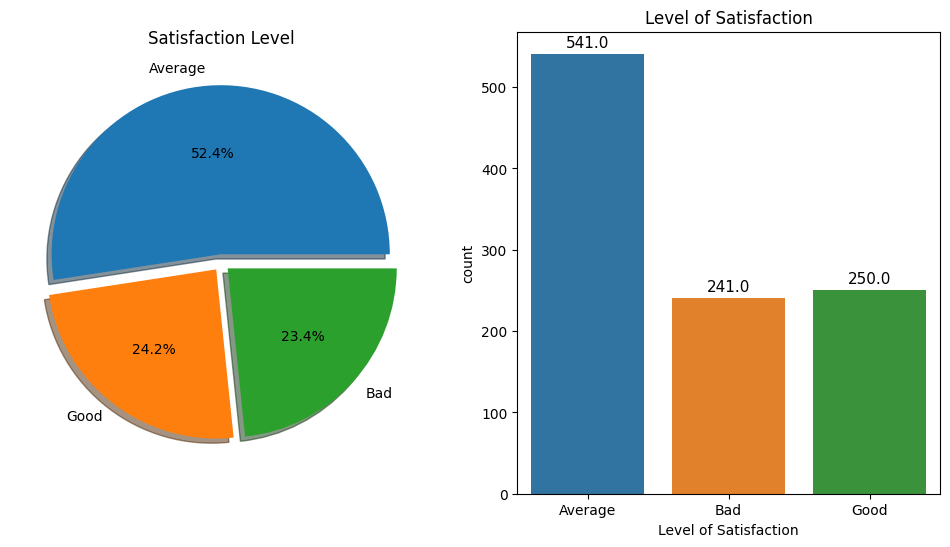

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

df4["Level of Satisfaction"].value_counts().plot(kind="pie", explode=[0.05, 0.05,  0.05], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title("Satisfaction Level")
ax[0].set_ylabel('')

count = sns.countplot(x="Level of Satisfaction", data=df4, ax=ax[1])
for bar in count.patches:
    count.annotate(format(bar.get_height()),
        (bar.get_x() + bar.get_width() / 2,
        bar.get_height()), ha='center', va='center',
        size=11, xytext=(0, 8),
        textcoords='offset points')
ax[1].set_title("Level of Satisfaction")
plt.show()

As we can see, this dataset is imbalanced.

More than 50% (541) of students in this dataset have average satisfaction, almost 23% (251) have a good satisfaction, and  24% (241) of students have bad satisfaction in online education.

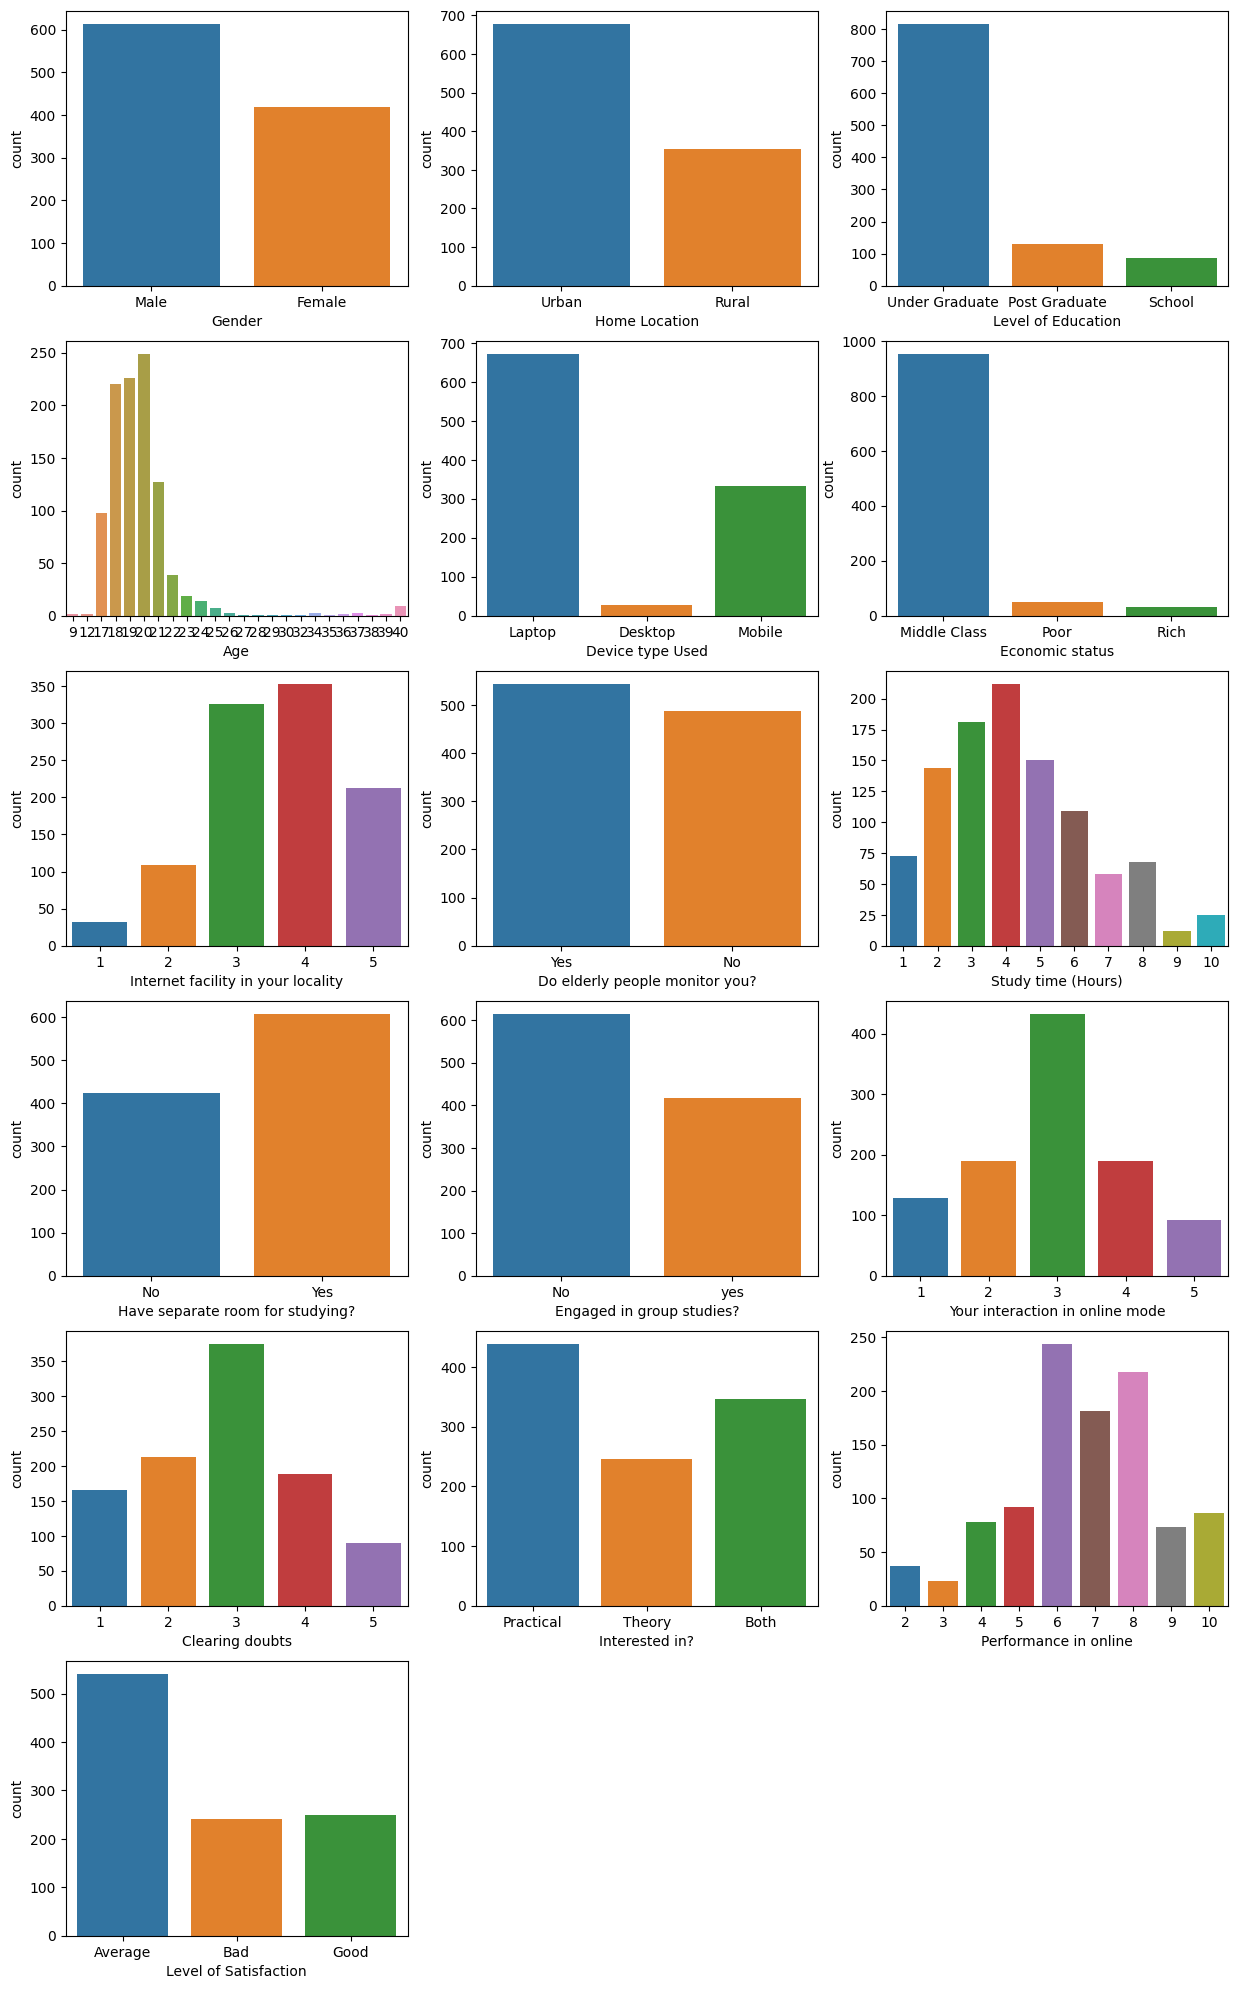

In [56]:
i = 1
plt.figure(figsize = (15,25))
for feature in df4:
    plt.subplot(6,3,i)
    sns.countplot(x = feature ,  data = df4)
    i +=1

There are more males than females in this dataset with an age distribution ranging from 2 to 40 years. Most of them live in the city area and have a moderate financial condition. Most of them are in a graduate program. We can see that most of the study has around 3 a 4 hours of studying and some of them has a separated room for studyng. These students mostly use laptops to do online learning. 




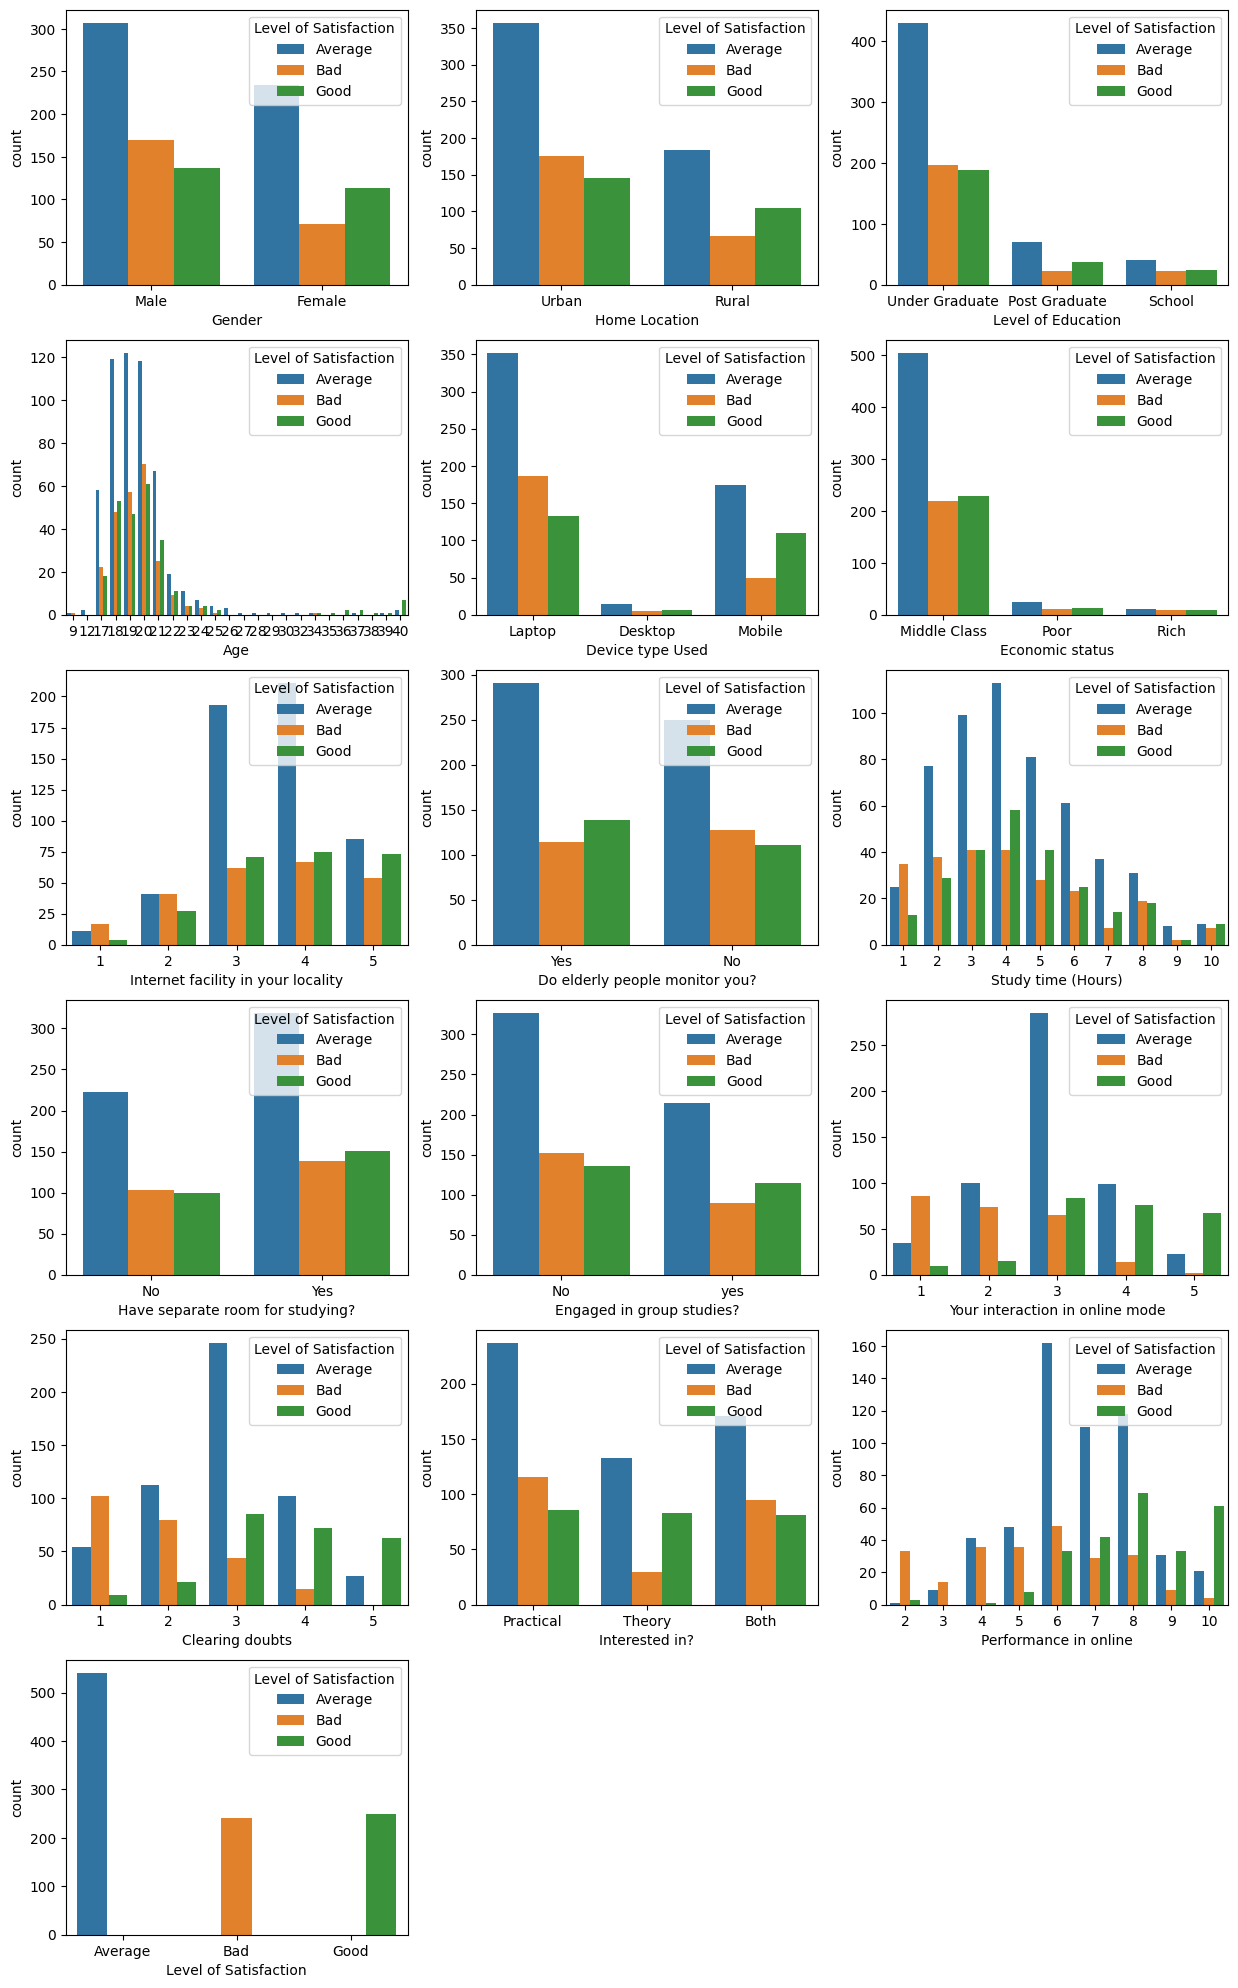

In [57]:
i = 1
plt.figure(figsize = (15,25))
for feature in df4:
    plt.subplot(6,3,i)
    sns.countplot(x = feature , hue='Level of Satisfaction', data = df4)
    i +=1

In [34]:
pd.crosstab(df4["Home Location"], df4["Economic status"]).style.background_gradient(cmap='Blues')

Economic status,Middle Class,Poor,Rich
Home Location,,,
Rural,316,35,3
Urban,637,14,27


In [29]:
pd.crosstab(df4["Performance in online"], df4["Level of Satisfaction"]).style.background_gradient(cmap='Blues')

Level of Satisfaction,Average,Bad,Good
Performance in online,,,
2,1,33,3
3,9,14,0
4,41,36,1
5,48,36,8
6,162,49,33
7,110,29,42
8,118,31,69
9,31,9,33
10,21,4,61


In [30]:
pd.crosstab(df4["Your interaction in online mode"], df4["Level of Satisfaction"]).style.background_gradient(cmap='Blues')

Level of Satisfaction,Average,Bad,Good
Your interaction in online mode,,,
1,34,86,9
2,100,74,15
3,285,65,83
4,99,14,76
5,23,2,67


In [37]:
pd.crosstab([df4["Gender"], df4["Clearing doubts"]], df4["Level of Satisfaction"]).style.background_gradient(cmap='Blues')

In [58]:
df4.head()

,Gender,Home Location,Level of Education,Age,Device type Used,Economic status,Internet facility in your locality,Do elderly people monitor you?,Study time (Hours),Have separate room for studying?,Engaged in group studies?,Your interaction in online mode,Clearing doubts,Interested in?,Performance in online,Level of Satisfaction
0,Male,Urban,Under Graduate,18,Laptop,Middle Class,5,Yes,3,No,No,1,1,Practical,6,Average
1,Male,Urban,Under Graduate,19,Laptop,Middle Class,1,Yes,7,Yes,No,1,1,Theory,3,Bad
2,Male,Rural,Under Graduate,18,Laptop,Middle Class,2,Yes,6,Yes,No,1,1,Both,6,Bad
3,Male,Urban,Under Graduate,18,Laptop,Middle Class,4,Yes,3,No,yes,1,2,Theory,4,Bad
4,Male,Rural,Under Graduate,18,Laptop,Middle Class,3,No,8,Yes,yes,3,3,Both,6,Average


In [59]:
X = df4.drop("Level of Satisfaction", axis=1)
y = df4["Level of Satisfaction"]

In [68]:
# Encoding Ordinal Variable
X_new = X.replace({"Level of Education": {
        "Under Graduate'": 1,
        "Post Graduate": 2,
        "School": 3},
    "Device type Used": {
        "Laptop": 1,
        "Desktop": 2,
        "Mobile": 3},
    "Economic status": {
        "Middle Class": 1,
        "Poor": 2,
        "Rich": 3},
    "Do elderly people monitor you?":{
        "Yes":1,
        "No":2},
    'Have separate room for studying?':{
         "Yes":1,
         "No":2},
    "Interested in?":{
        "Practical":1,
        "Theory":2,
        "Both":3}}).infer_objects(copy=False)


# Encoding Nominal Variable
X_new = pd.get_dummies(X_new)

/var/folders/j3/cx6mmlb55xq40hncvggj96680000gn/T/ipykernel_86984/4059024582.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_new = X.replace({"Level of Education": {


In [69]:
X_new.head()

,Age,Device type Used,Economic status,Internet facility in your locality,Do elderly people monitor you?,Study time (Hours),Have separate room for studying?,Your interaction in online mode,Clearing doubts,Interested in?,Performance in online,Gender_Female,Gender_Male,Home Location_Rural,Home Location_Urban,Level of Education_2,Level of Education_3,Level of Education_Under Graduate,Engaged in group studies?_No,Engaged in group studies?_yes
0,18,1,1,5,1,3,2,1,1,1,6,False,True,False,True,False,False,True,True,False
1,19,1,1,1,1,7,1,1,1,2,3,False,True,False,True,False,False,True,True,False
2,18,1,1,2,1,6,1,1,1,3,6,False,True,True,False,False,False,True,True,False
3,18,1,1,4,1,3,2,1,2,2,4,False,True,False,True,False,False,True,False,True
4,18,1,1,3,2,8,1,3,3,3,6,False,True,True,False,False,False,True,False,True


In [102]:
X_new.corr().style.background_gradient(cmap="Blues")

,Age,Device type Used,Economic status,Internet facility in your locality,Do elderly people monitor you?,Study time (Hours),Have separate room for studying?,Your interaction in online mode,Clearing doubts,Interested in?,Performance in online,Gender_Female,Gender_Male,Home Location_Rural,Home Location_Urban,Level of Education_2,Level of Education_3,Level of Education_Under Graduate,Engaged in group studies?_No,Engaged in group studies?_yes
Age,1.000000,-0.023881,-0.008802,0.073889,0.040625,0.005217,-0.023881,0.173892,0.127400,0.030269,0.116636,0.042610,-0.042610,-0.003626,0.003626,0.416524,-0.145828,-0.239019,-0.111043,0.111043
Device type Used,-0.023881,1.000000,-0.008516,-0.255566,0.029830,-0.039827,0.186845,0.108227,0.130732,-0.062637,0.051525,0.034593,-0.034593,0.298944,-0.298944,0.076747,-0.061545,-0.020358,-0.002079,0.002079
Economic status,-0.008802,-0.008516,1.000000,0.075508,0.037050,-0.021488,0.061595,0.040047,0.039242,0.016335,0.026498,0.019458,-0.019458,0.018865,-0.018865,-0.034689,-0.001687,0.029353,0.005275,-0.005275
Internet facility in your locality,0.073889,-0.255566,0.075508,1.000000,-0.033345,-0.011361,-0.217403,0.202420,0.156911,0.101091,0.255643,0.068081,-0.068081,-0.283117,0.283117,-0.061451,0.013885,0.040473,-0.038414,0.038414
Do elderly people monitor you?,0.040625,0.029830,0.037050,-0.033345,1.000000,-0.087196,0.049326,-0.105541,-0.111473,0.050310,-0.091208,-0.026327,0.026327,0.022914,-0.022914,0.011737,-0.014946,0.000666,0.083794,-0.083794
Study time (Hours),0.005217,-0.039827,-0.021488,-0.011361,-0.087196,1.000000,-0.083099,0.149392,0.175742,0.036585,0.134793,0.084079,-0.084079,0.059053,-0.059053,-0.031576,-0.059361,0.066211,-0.013169,0.013169
Have separate room for studying?,-0.023881,0.186845,0.061595,-0.217403,0.049326,-0.083099,1.000000,-0.076027,-0.066990,-0.070786,-0.077824,0.017106,-0.017106,0.093591,-0.093591,0.041687,-0.061985,0.008444,0.077566,-0.077566
Your interaction in online mode,0.173892,0.108227,0.040047,0.202420,-0.105541,0.149392,-0.076027,1.000000,0.722277,0.032775,0.556126,0.137686,-0.137686,0.071000,-0.071000,0.088283,-0.065616,-0.026956,-0.108980,0.108980
Clearing doubts,0.127400,0.130732,0.039242,0.156911,-0.111473,0.175742,-0.066990,0.722277,1.000000,0.036020,0.559728,0.121453,-0.121453,0.092575,-0.092575,0.069991,-0.046028,-0.025463,-0.116114,0.116114
Interested in?,0.030269,-0.062637,0.016335,0.101091,0.050310,0.036585,-0.070786,0.032775,0.036020,1.000000,0.055736,-0.040327,0.040327,-0.111545,0.111545,-0.079311,0.003036,0.062403,-0.018593,0.018593


In [104]:
X_new=X_new.drop(columns=['Device type Used','Do elderly people monitor you?','Have separate room for studying?','Interested in?','Home Location_Rural','Home Location_Urban','Level of Education_2','Level of Education_3','Level of Education_Under Graduate'])

In [105]:
X_new.head()

,Age,Economic status,Internet facility in your locality,Study time (Hours),Your interaction in online mode,Clearing doubts,Performance in online,Gender_Female,Gender_Male,Engaged in group studies?_No,Engaged in group studies?_yes
0,18,1,5,3,1,1,6,False,True,True,False
1,19,1,1,7,1,1,3,False,True,True,False
2,18,1,2,6,1,1,6,False,True,True,False
3,18,1,4,3,1,2,4,False,True,False,True
4,18,1,3,8,3,3,6,False,True,False,True


In [106]:
X_train, X_test, y_train, y_test =train_test_split(X_new, y, test_size = 0.3,  random_state = 1) # 70% training and 30% test

In [107]:
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1032, 15), (1032,), (722, 11), (310, 11), (722,), (310,))

In [108]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf_RF = RandomForestClassifier(n_estimators = 100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf_RF.fit(X_train, y_train)

y_pred = clf_RF.predict(X_test)

In [109]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Rounded upto 2 decimal places
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )

Accuracy: 0.5967741935483871
Accuracy: 0.60


In [110]:
X.columns.tolist()

['Gender',
 'Home Location',
 'Level of Education',
 'Age',
 'Device type Used',
 'Economic status',
 'Internet facility in your locality',
 'Do elderly people monitor you?',
 'Study time (Hours)',
 'Have separate room for studying?',
 'Engaged in group studies?',
 'Your interaction in online mode',
 'Clearing doubts',
 'Interested in?',
 'Performance in online']

In [111]:
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [112]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [113]:
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.624543 (0.047009)
LDA: 0.642580 (0.046499)
KNN: 0.568988 (0.073921)
CART: 0.508314 (0.055038)
NB: 0.614897 (0.038127)
SVM: 0.614859 (0.047032)


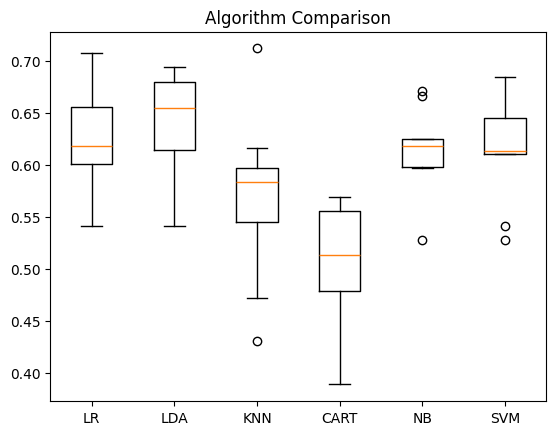

In [114]:
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

# References

https://www.kaggle.com/datasets/bhavyajha14/online-educations-system/data